# define The NFA 

In [25]:
# NFA that detect all the strings from 0s and 1s such that the 4th symbol from the end is 1
NFA = {
    ('q0', '0') : ['q0'],
    ('q0', '1') : ['q0', 'q1'],
    ('q1', '0') : ['q2'],
    ('q1', '1') : ['q2'],
    ('q2', '0') : ['q3'],
    ('q2', '1') : ['q3'],
    ('q3', '0') : ['q4'],
    ('q3', '1') : ['q4'],
    ('q4', '0') : [],
    ('q4', '1') : []
}

start_state = 'q0'
final_states = ['q4']

# generate the DFA from the NFA

<h5>The 'epsilon_closure' function takes in a state and an NFA and computes the epsilon closure of the state. It uses a stack and a set to keep track of visited states and adds any new epsilon transitions to the stack. The function returns a frozenset representing the epsilon closure of the state.<h5>

In [26]:
def epsilon_closure(state, NFA):
    """
    Computes the epsilon closure of a state in an NFA.
    Args:
        state: a set representing a state in the NFA
        NFA: a dictionary representing the NFA
    Returns:
        A frozenset representing the epsilon closure of the state.
    """
    closure = set(state) # Create a set to store the closure and add the initial state
    stack = list(state) # Create a stack to store the states to be processed

    # Continue processing until the stack is empty
    while stack: 
        s = stack.pop() # Pop the next state from the stack

        # Check for epsilon transitions from the current state
        for t in NFA.get((s, 'epsilon'), []): 
            
            # If the next state is not already in the closure, add it and push it onto the stack
            if t not in closure:
                closure.add(t)
                stack.append(t)

    # Convert the closure to a frozenset and return it
    return frozenset(closure)

<h5>The 'NFA_To_DFA' function takes in an NFA, a start state, and a list of final states, and returns a tuple containing the transition function, start state, and final states of the equivalent DFA. It uses the subset construction algorithm to construct the DFA by processing each state in the NFA and creating new states based on input symbols and epsilon transitions. The function uses the 'epsilon_closure' function to compute the epsilon closure of new states and adds them to a list of unprocessed states. The DFA transition function is represented by a dictionary where each key is a string representing a set of states and an input symbol, and each value is a string representing a set of states that the input symbol can transition to from the key state. The final states of the DFA are the sets of states that contain at least one final state of the NFA. The function returns the DFA transition function, start state, and final states as a tuple.<h5>

In [27]:
def NFA_To_DFA(NFA, start_state, final_states):
    """
    Converts an NFA to a DFA using the subset construction algorithm.
    Args:
        NFA: a dictionary representing the NFA
        start_state: a string representing the start state of the NFA
        final_states: a list of strings representing the final states of the NFA
    Returns:
        A tuple containing:
        dfa_transition: a dictionary representing the DFA
        dfa_start_state: a string representing the start state of the DFA
        dfa_final_states: a list of strings representing the final states of the DFA
    """
    dfa_transition = {} # dictionary representing the transition function of the DFA
    dfa_start_state = f"{set(epsilon_closure([start_state], NFA))}" # the start state of the DFA
    dfa_final_states = [] # list of final states of the DFA
    unprocessed_states = [epsilon_closure([start_state], NFA)] # list of unprocessed states in the DFA
    processed_states = set() # set of processed states in the DFA
    while unprocessed_states:
        state = unprocessed_states.pop() # get an unprocessed state
        processed_states.add(state) # add it to the processed states set
        for symbol in ['0', '1']: # for each input symbol
            next_state = set() # set of states that can be reached from the current state with the input symbol
            for s in state: 
                next_state.update(NFA.get((s, symbol), [])) # add states that can be reached with the input symbol
            next_state = epsilon_closure(next_state, NFA) # add epsilon closure of the new states
            if next_state not in processed_states and next_state not in unprocessed_states : 
                unprocessed_states.append(next_state) # add the new state to the list of unprocessed states
            dfa_transition[f"{set(state)}", symbol] = f"{set(next_state)}" # add the transition to the DFA transition function
        if any(s in final_states for s in state):
            dfa_final_states.append(f"{set(state)}")  # add the state to the list of final states if it contains a final state of the NFA
    dfa_final_states = [s for s in dfa_final_states if s] # remove empty strings from the list of final states
    return dfa_transition, dfa_start_state, dfa_final_states

In [28]:
# Call the function with the NFA transition function, start state, and final states to generate DFA transition function, start state, and final states
dfa_transition, dfa_start_state, dfa_final_states = NFA_To_DFA(NFA, start_state, final_states)

# print result
print("DFA transition function:")
for k,v in dfa_transition.items():
    print(f"{k[0]} ----{k[1]}----> {v}")
print("------------------------------------------------------------------------------------")
print("DFA start state:")
print(dfa_start_state)
print("------------------------------------------------------------------------------------")
print("DFA final states:")
for i in dfa_final_states:
    print(i)


DFA transition function:
{'q0'} ----0----> {'q0'}
{'q0'} ----1----> {'q0', 'q1'}
{'q0', 'q1'} ----0----> {'q0', 'q2'}
{'q0', 'q1'} ----1----> {'q0', 'q1', 'q2'}
{'q0', 'q1', 'q2'} ----0----> {'q3', 'q0', 'q2'}
{'q0', 'q1', 'q2'} ----1----> {'q3', 'q0', 'q1', 'q2'}
{'q3', 'q0', 'q1', 'q2'} ----0----> {'q3', 'q0', 'q4', 'q2'}
{'q3', 'q0', 'q1', 'q2'} ----1----> {'q3', 'q4', 'q1', 'q0', 'q2'}
{'q3', 'q4', 'q1', 'q0', 'q2'} ----0----> {'q3', 'q0', 'q4', 'q2'}
{'q3', 'q4', 'q1', 'q0', 'q2'} ----1----> {'q3', 'q4', 'q1', 'q0', 'q2'}
{'q3', 'q0', 'q4', 'q2'} ----0----> {'q3', 'q0', 'q4'}
{'q3', 'q0', 'q4', 'q2'} ----1----> {'q3', 'q0', 'q4', 'q1'}
{'q3', 'q0', 'q4', 'q1'} ----0----> {'q0', 'q4', 'q2'}
{'q3', 'q0', 'q4', 'q1'} ----1----> {'q0', 'q4', 'q1', 'q2'}
{'q0', 'q4', 'q1', 'q2'} ----0----> {'q3', 'q0', 'q2'}
{'q0', 'q4', 'q1', 'q2'} ----1----> {'q3', 'q0', 'q1', 'q2'}
{'q0', 'q4', 'q2'} ----0----> {'q3', 'q0'}
{'q0', 'q4', 'q2'} ----1----> {'q3', 'q0', 'q1'}
{'q3', 'q0', 'q1'} ----0---

## Draw the DFA

<h5>The 'draw_dfa' function creates a directed graph for the DFA using the 'graphviz' library. The function takes in the DFA, start state, and final states as arguments and returns a plot for the DFA graph.<h5>

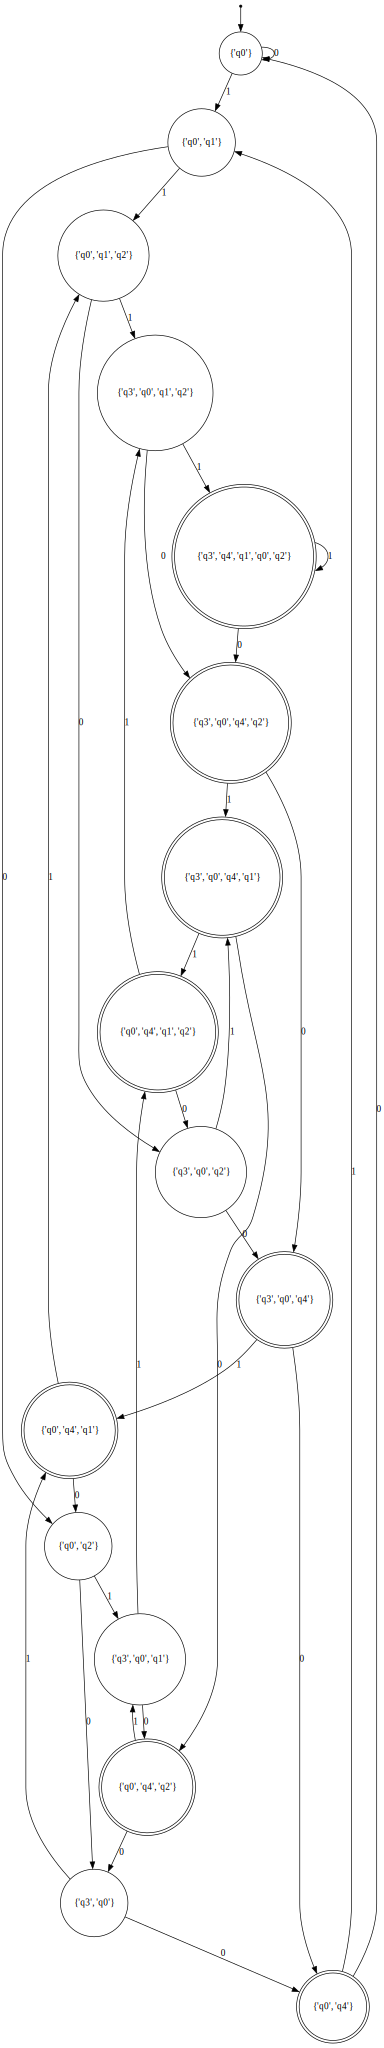

In [29]:
# imports the graphviz library for creating and rendering graphs
import graphviz

def draw_dfa(DFA, start_state, final_states):
    """
    Draw DFA draph.
    Args:
        DFA: a dictionary representing the DFA
        start_state: a string representing the start state of the DFA
        final_states: a list of strings representing the final states of the DFA
    Returns:
        dot: a plot for the DFA graph
    """
    # create a new directed graph using Graphviz
    dot = graphviz.Digraph()
    
    # add nodes to the graph for each state in the DFA
    for state,_ in DFA.keys():
        # set the shape of the node to doublecircle if it is a final state, otherwise set it to circle
        if state in final_states:
            dot.node(str(state), shape='doublecircle')
        else:
            dot.node(str(state), shape='circle')

    # add an edge to the graph from the start node to the start state of the DFA
    dot.node(str('start'),shape='point')
    dot.edge('start', str(start_state))

    # add edges to the graph for each transition in the DFA
    for state_symbol, next_state in DFA.items():
        # set the label of the edge to the symbol that triggers the transition
        dot.edge(str(state_symbol[0]), str(next_state), label=str(state_symbol[1]))

    return dot

# Call the draw_dfa function with the DFA, start state, and final states as arguments, and display the graph
draw_dfa(dfa_transition, dfa_start_state, dfa_final_states)
# RUN THE CODE IF THE IMAGE DIDN'T DISPLAY

## Find the string

<h5>To get the string that visits all the states we need to preform DFS, 'generate_string_dfa' function takes in a deterministic finite automaton ('dfa'), a start state ('start_state'), and a set of final states ('final_states'). It then performs a depth-first search (DFS) on the DFA, starting from the start state.<h5>

In [30]:
def generate_string_dfa(dfa, start_state, final_states):
    """
    Find a string that visit all the states in DFA graph.
    Args:
        dfa: a dictionary representing the DFA
        start_state: a string representing the start state of the DFA
        final_states: a list of strings representing the final states of the DFA
    Returns:
        string: a string that visit all the states in DFA graph if it be found
        otherwise None
    """
    # Create a stack with the start state and the string "0"
    stack = [(start_state, "0")]

    visited = set() # Create an empty set to store the visited states
    states = set() # Create a set to store all the states in the DFA

    # Add all the states in the DFA to the set of states
    for state,_ in dfa.keys():
      states.add(state)

    # While the stack is not empty
    while stack:

        state, string = stack.pop() # Pop the top element from the stack

        # If the state has already been visited, skip it
        if state in visited:
            continue
        visited.add(state) # Add the current state to the set of visited states

        # If the current state is a final state and all states have been visited, return the string
        if state in final_states and visited == states:
            return string
        
        # For each symbol in the input alphabet
        for symbol in ['0', '1']:
            next_state = dfa[(state,symbol)] # Find the next state for the current state and symbol
            stack.append((next_state, string + symbol)) # Push the next state and the updated string onto the stack

    # If no valid string is found, return None
    return None

# Call the function with the DFA transition function, start state, and final states to generate a string that is accepted by the DFA
string = generate_string_dfa(dfa_transition, dfa_start_state, dfa_final_states)
print(f'The string that visits all states: {string}, we use depth first search to genrate it')

The string that visits all states: 0111101100101000, we use depth first search to genrate it
